In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
warnings.filterwarnings("ignore")

In [6]:
df=w.get_explore_data()

In [7]:
df=w. prep_data(df, features=w.features)

In [9]:
df=w.rename_data(df)

In [10]:
df

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,sea_level_press,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb
0,BSh,200,0.0,0.833333,2014-09-01,237.00,94.31,98644.97,42.45,81.72,101352.08,28.744480,31246.63,16666.81,5899.66,1535.52,-2.56,-5.22,-3.52,4.41
1,BSh,200,0.0,0.833333,2014-09-02,228.90,100.85,98686.80,42.66,82.56,101396.02,28.370585,31244.78,16667.31,5901.03,1538.00,-2.39,-5.20,-4.49,3.74
2,BSh,200,0.0,0.833333,2014-09-03,220.69,101.25,98712.85,43.23,83.29,101429.25,28.133059,31239.27,16668.39,5902.18,1540.32,-2.76,-5.00,-5.44,3.40
3,BSh,200,0.0,0.833333,2014-09-04,225.28,101.90,98711.70,43.11,83.26,101440.85,28.256798,31232.86,16667.39,5903.07,1541.10,-3.00,-4.61,-5.76,3.29
4,BSh,200,0.0,0.833333,2014-09-05,237.24,82.95,98686.46,42.98,82.50,101419.53,28.372353,31226.16,16665.65,5903.36,1539.73,-3.40,-4.25,-6.09,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,Dfb,100,1.0,0.866667,2016-08-27,312.05,57.45,97613.96,24.32,70.25,101373.91,17.150954,31484.23,16540.22,5763.23,1501.92,23.20,1.32,9.59,2.96
375730,Dfb,100,1.0,0.866667,2016-08-28,305.82,53.53,97631.29,23.92,71.08,101397.77,16.962051,31476.67,16534.71,5760.19,1502.70,23.18,1.40,7.14,2.30
375731,Dfb,100,1.0,0.866667,2016-08-29,311.62,52.12,97588.69,23.94,69.74,101368.67,16.915474,31464.71,16526.98,5754.76,1499.57,24.49,1.75,7.05,2.19
375732,Dfb,100,1.0,0.866667,2016-08-30,304.54,51.73,97538.62,23.61,69.71,101321.24,16.536761,31448.83,16512.39,5742.21,1493.14,25.80,1.84,7.74,1.88


In [11]:
train, validate, test=w.split_data(df, test_size=0.15)

In [12]:
train.head()

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,sea_level_press,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb
116277,BSk,1800,0.454545,0.300000,2014-10-19,294.86,0.03,83362.52,8.53,28.94,101443.38,16.680867,30825.95,16475.47,5796.30,1504.26,18.22,-0.87,3.46,2.04
237629,Csb,1100,0.727273,0.066667,2014-10-25,127.70,63.74,89156.29,16.71,83.14,101841.63,5.987106,30801.60,16340.47,5689.14,1504.33,24.22,1.52,1.08,3.10
272599,BSk,800,0.772727,0.700000,2016-06-29,481.48,41.43,89665.38,22.36,54.72,101003.07,21.549640,31605.85,16624.04,5828.97,1492.70,23.68,-0.08,2.35,1.04
205713,Dfb,2000,0.636364,0.500000,2015-06-30,453.35,24.78,77957.43,17.11,47.80,101361.57,19.173942,31576.02,16662.35,5875.87,1505.58,15.35,0.50,5.52,1.09
120041,BSk,1900,0.454545,0.466667,2015-02-05,135.47,0.00,81613.28,6.06,62.50,102053.60,6.862285,30715.39,16357.43,5755.62,1535.91,19.55,0.42,-10.67,0.27


array([[<AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'startdate'}>],
       [<AxesSubplot:title={'center':'potential_evap'}>,
        <AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'barometric_pressure'}>,
        <AxesSubplot:title={'center':'all_atmos_precip'}>],
       [<AxesSubplot:title={'center':'relative_humidity'}>,
        <AxesSubplot:title={'center':'sea_level_press'}>,
        <AxesSubplot:title={'center':'mean_temp'}>,
        <AxesSubplot:title={'center':'height_10_mb'}>],
       [<AxesSubplot:title={'center':'height_100_mb'}>,
        <AxesSubplot:title={'center':'height_500_mb'}>,
        <AxesSubplot:title={'center':'height_850_mb'}>,
        <AxesSubplot:title={'center':'zonal_wind_250mb'}>],
       [<AxesSubplot:title={'center':'zonal_wind_925mb'}>,
        <AxesSubplot:title={'center':'long_wind_250mb'}>,
    

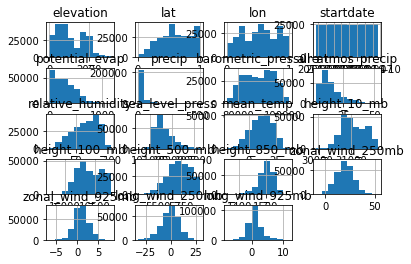

In [13]:
train.hist()

In [ ]:
#Regions
#
#Dfb    256
#Cfa    207
#Csb    203
#Dfa    105
#BWk     94
#Dfc     69
#BWh     64
#Csa     50
#Dsb     39
#Cfb     20
#BSh     14
#Dsc     14
#Dwa      6
#Dwb      2

In [ ]:
region = df[df['long_wind_925mb']==0]['region']

<AxesSubplot:xlabel='region', ylabel='count'>

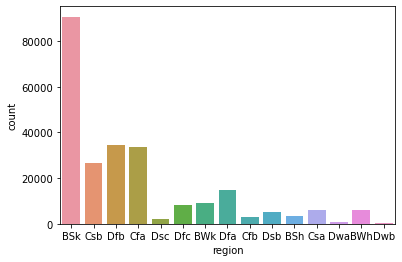

In [17]:
sns.countplot(x ='region', data = train)

In [ ]:
sns.countplot( ='sex', hue = "smoker", data = train)

<AxesSubplot:xlabel='potential_evap', ylabel='Count'>

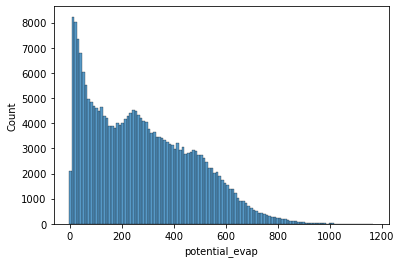

In [18]:
sns.histplot(data=train, x="potential_evap")

<AxesSubplot:xlabel='barometric_pressure', ylabel='Count'>

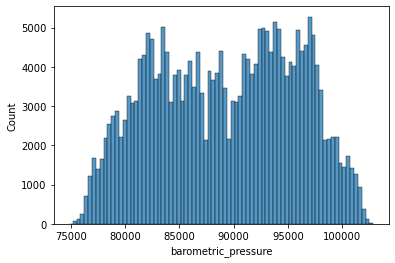

In [19]:
sns.histplot(data=train, x="barometric_pressure")

<AxesSubplot:xlabel='all_atmos_precip', ylabel='Count'>

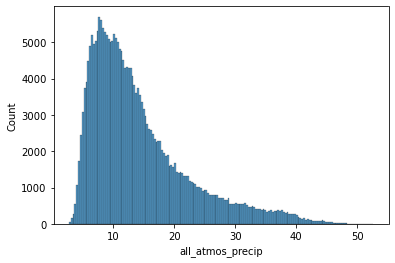

In [20]:
sns.histplot(data=train, x="all_atmos_precip")

<AxesSubplot:xlabel='relative_humidity', ylabel='Count'>

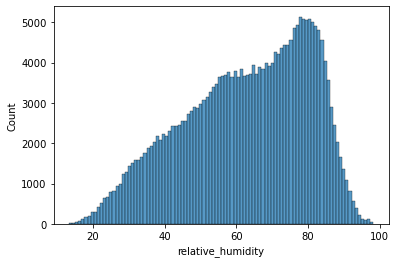

In [21]:
sns.histplot(data=train, x="relative_humidity")

<AxesSubplot:xlabel='sea_level_press', ylabel='Count'>

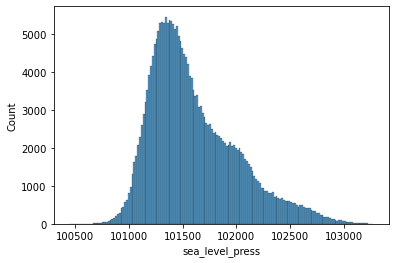

In [22]:
sns.histplot(data=train, x="sea_level_press")

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

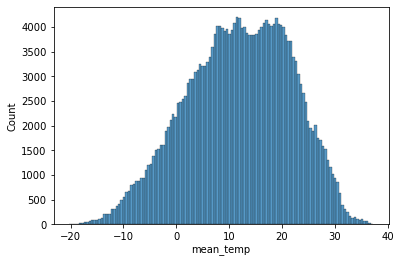

In [23]:
sns.histplot(data=train, x="mean_temp")

<AxesSubplot:xlabel='height_10_mb', ylabel='Count'>

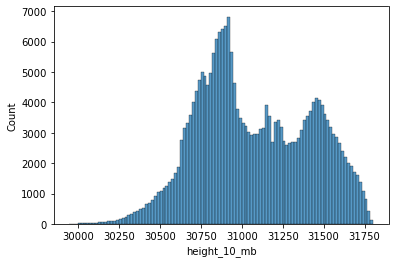

In [24]:
sns.histplot(data=train, x="height_10_mb")

<AxesSubplot:xlabel='height_100_mb', ylabel='Count'>

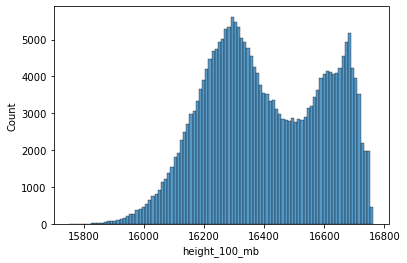

In [25]:
sns.histplot(data=train, x="height_100_mb")

<AxesSubplot:xlabel='height_500_mb', ylabel='Count'>

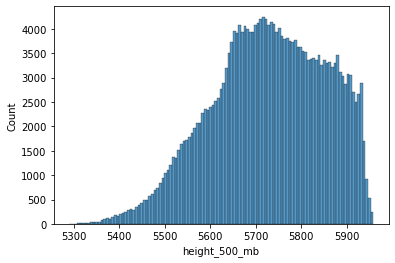

In [26]:
sns.histplot(data=train, x="height_500_mb")

<AxesSubplot:xlabel='height_850_mb', ylabel='Count'>

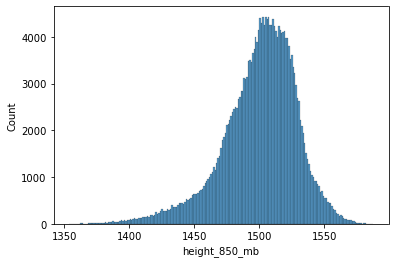

In [27]:
sns.histplot(data=train, x="height_850_mb")

<AxesSubplot:xlabel='zonal_wind_250mb', ylabel='Count'>

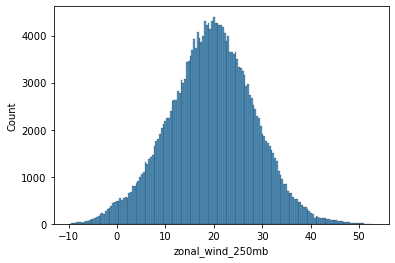

In [28]:
sns.histplot(data=train, x="zonal_wind_250mb")

<AxesSubplot:xlabel='zonal_wind_925mb', ylabel='Count'>

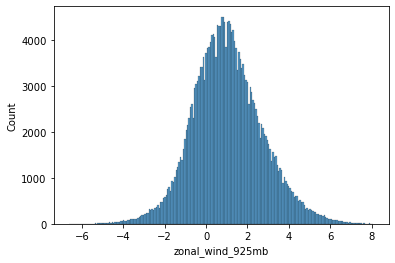

In [29]:
sns.histplot(data=train, x="zonal_wind_925mb")

<AxesSubplot:xlabel='long_wind_250mb', ylabel='Count'>

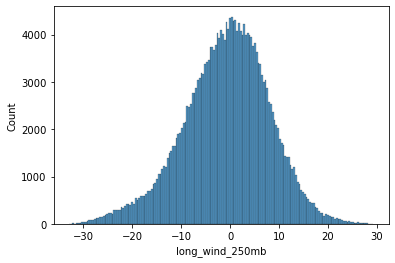

In [30]:
sns.histplot(data=train, x="long_wind_250mb")

<AxesSubplot:xlabel='long_wind_925mb', ylabel='Count'>

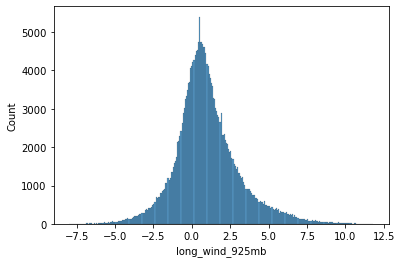

In [31]:
sns.histplot(data=train, x="long_wind_925mb")

In [ ]:
# compare the columns to each other
sns.pairplot(data=train, kind="reg", corner=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))      
corr = train.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
cat= region
target = mean_temp
def explore_cats(train, cats, target):
    '''
    This function takes:
            train = train DataFrame
            cats = category columns (as a list of strings)
            target = target variable (as a string)
    prints value counts for each category in each column
    '''
    for col in cats:
        print(col)
        print(train[col].value_counts())
        print(train[col].value_counts(normalize=True)*100)
        sns.countplot(x=col, data=train)
        plt.title(col+' counts')
        plt.show()
    
        sns.barplot(data=train, x=col, y=target)
        rate = train[target].mean()
        plt.axhline(rate, label= 'average ' + target + ' rate')
        plt.legend()
        plt.title(target+' rate by '+col)
        plt.show()
    
        alpha = 0.05
        o = pd.crosstab(train[col], train[target])
        chi2, p, dof, e = stats.chi2_contingency(o)
        result = p < alpha
        print('P is less than alpha: '+result.astype('str'))
        print('------------------------------------------------------------')

In [ ]:
# looking closer at monthly charges and churn
sns.kdeplot(data=train, x='bmi_binned', y='outcome', hue='glucose_binned')
rate = train.outcome.mean()
plt.title('outcome by bmi')
plt.show()
